In [24]:
import numpy as np
import pandas as pd
from pathlib import Path
import sys
from PIL import Image
import os
import matplotlib.pyplot as plt
from tqdm import tqdm
import skimage

In [25]:
pd.read_csv("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/bbbc021_all/metadata/bbbc021_df_all.csv")

,Unnamed: 0.1,Unnamed: 0,SAMPLE_KEY,BATCH,TABLE_NUMBER,IMAGE_NUMBER,OBJECT_NUMBER,CPD_NAME,SMILES,DOSE,ANNOT,STATE,PLATE,SPLIT
0,0,0,Week1_22123_1_11_3.0,Week1_22123,1,11,3.0,cytochalasin B,C[C@@H]1CCC[C@@H](O)\\C=C\\C(=O)O[C@]23[C@@H](...,10.0,Actin disruptors,trt,22123,train
1,1,1,Week1_22123_1_11_5.0,Week1_22123,1,11,5.0,cytochalasin B,C[C@@H]1CCC[C@@H](O)\\C=C\\C(=O)O[C@]23[C@@H](...,10.0,Actin disruptors,trt,22123,train
2,2,2,Week1_22123_1_11_6.0,Week1_22123,1,11,6.0,cytochalasin B,C[C@@H]1CCC[C@@H](O)\\C=C\\C(=O)O[C@]23[C@@H](...,10.0,Actin disruptors,trt,22123,train
3,3,3,Week1_22123_1_11_7.0,Week1_22123,1,11,7.0,cytochalasin B,C[C@@H]1CCC[C@@H](O)\\C=C\\C(=O)O[C@]23[C@@H](...,10.0,Actin disruptors,trt,22123,train
4,4,4,Week1_22123_1_11_8.0,Week1_22123,1,11,8.0,cytochalasin B,C[C@@H]1CCC[C@@H](O)\\C=C\\C(=O)O[C@]23[C@@H](...,10.0,Actin disruptors,trt,22123,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97499,97499,107380,Week10_40119_0_522_201.0,Week10_40119,0,522,201.0,DMSO,CS(=O)C,0.0,DMSO,control,40119,train
97500,97500,112443,Week10_40119_0_680_426.0,Week10_40119,0,680,426.0,DMSO,CS(=O)C,0.0,DMSO,control,40119,train
97501,97501,111170,Week10_40119_0_678_299.0,Week10_40119,0,678,299.0,DMSO,CS(=O)C,0.0,DMSO,control,40119,train
97502,97502,112787,Week10_40119_0_717_178.0,Week10_40119,0,717,178.0,DMSO,CS(=O)C,0.0,DMSO,control,40119,test


In [26]:
import torch
torch.cuda.is_available()

True

In [27]:
def convert_to_8bit(image_array):
    # Normalize to the 0-255 range
    image_8bit = ((image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array)) * 255).astype(np.uint8)
    return image_8bit

In [28]:
folder = Path("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw")

In [29]:
metadata = pd.read_csv(folder / "BBBC021_v1_image.csv", 
                      index_col=0)
metadata

,ImageNumber,Image_FileName_DAPI,Image_PathName_DAPI,Image_FileName_Tubulin,Image_PathName_Tubulin,Image_FileName_Actin,Image_PathName_Actin,Image_Metadata_Plate_DAPI,Image_Metadata_Well_DAPI,Replicate,Image_Metadata_Compound,Image_Metadata_Concentration
TableNumber,,,,,,,,,,,,
4,233,G10_s1_w1BEDC2073-A983-4B98-95E9-84466707A25D.tif,Week4/Week4_27481,G10_s1_w2DCEC82F3-05F7-4F2F-B779-C5DF9698141E.tif,Week4/Week4_27481,G10_s1_w43CD51CBC-2370-471F-BA01-EE250B14B3C8.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,234,G10_s2_w11C3B9BCC-E48F-4C2F-9D31-8F46D8B5B972.tif,Week4/Week4_27481,G10_s2_w2570437EF-C8DC-4074-8D63-7FA3A7271FEE.tif,Week4/Week4_27481,G10_s2_w400B21F33-BDAB-4363-92C2-F4FB7545F08C.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,235,G10_s3_w1F4FCE330-C71C-4CA3-9815-EAF9B9876EB5.tif,Week4/Week4_27481,G10_s3_w2194A9AC7-369B-4D84-99C0-DA809B0042B8.tif,Week4/Week4_27481,G10_s3_w4E0452054-9FC1-41AB-8C5B-D0ACD058991F.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,236,G10_s4_w1747818B4-FFA7-40EE-B0A0-6A5974AF2644.tif,Week4/Week4_27481,G10_s4_w298D4652F-B5BF-49F2-BE51-8149DF83EAFD.tif,Week4/Week4_27481,G10_s4_w42648D36D-6B77-41CD-B520-6E4C533D9ABC.tif,Week4/Week4_27481,Week4_27481,G10,1,5-fluorouracil,0.003
4,473,G10_s1_w10034568D-CC12-43C3-93A9-DC3782099DD3.tif,Week4/Week4_27521,G10_s1_w2A29ED14B-952C-4BA1-89B9-4F92B6DADEB4.tif,Week4/Week4_27521,G10_s1_w4DAA2E9D1-F6E9-45FA-ADC0-D341B647A680.tif,Week4/Week4_27521,Week4_27521,G10,2,5-fluorouracil,0.003
...,...,...,...,...,...,...,...,...,...,...,...,...
9,3560,Week9_090907_F11_s4_w19580FF4D-DC3D-4BD0-93FE-...,Week9/Week9_39301,Week9_090907_F11_s4_w2DC65EC6F-BDCA-4B05-B243-...,Week9/Week9_39301,Week9_090907_F11_s4_w45699A0F4-9AEE-4CD4-8973-...,Week9/Week9_39301,Week9_39301,F11,3,DMSO,0.000
9,3597,Week9_090907_G11_s1_w1EDE534D2-FCEE-4F92-A30B-...,Week9/Week9_39301,Week9_090907_G11_s1_w26A22E27F-6A81-43F5-9587-...,Week9/Week9_39301,Week9_090907_G11_s1_w4554A2BF7-0D53-4D27-BF92-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000
9,3598,Week9_090907_G11_s2_w10B010F39-3B4B-4DCB-8E34-...,Week9/Week9_39301,Week9_090907_G11_s2_w2720AC778-3F85-4293-8D75-...,Week9/Week9_39301,Week9_090907_G11_s2_w49B290958-BCF2-4DDD-B0E9-...,Week9/Week9_39301,Week9_39301,G11,3,DMSO,0.000


In [99]:
plate_images = {}
file_ids = {}
drug_ids = {}
dose_ids = {}
table_id = {}

In [101]:
for row in tqdm(metadata.iterrows()):
    # Generalities 
    week = row[1].Image_PathName_DAPI.split("/")[0]
    plate = row[1].Image_PathName_DAPI.split("/")[1].split("_")[1]
    image_number = row[1].ImageNumber
    table_number = row[0]
    file_id = f"{week}_{plate}_{table_number}_{image_number}"
    
    # File names 
    dapi = row[1].Image_FileName_DAPI
    tubulin = row[1].Image_FileName_Tubulin
    actin = row[1].Image_FileName_Actin
    week_plate_folder = folder / "images" / f"{week}_{plate}"
    # Read images
    dapi_image = np.array(Image.open(week_plate_folder / dapi))
    tubulin_image =  np.array(Image.open(week_plate_folder / tubulin))
    actin_image =  np.array(Image.open(week_plate_folder / actin))
    # Collapse all together 
    image = [actin_image[:,:,np.newaxis],
                tubulin_image[:,:,np.newaxis],
            dapi_image[:,:,np.newaxis]]
    image = convert_to_8bit(np.concatenate(image, axis=2))

    if plate not in plate_images:
        plate_images[plate] = []
        file_ids[plate] = []
        drug_ids[plate] = []
        dose_ids[plate] = []
        table_id[plate] = []
    
    plate_images[plate].append(image)
    file_ids[plate].append(file_id)
    drug_ids[plate].append(row[1].Image_Metadata_Compound) 
    dose_ids[plate].append(row[1].Image_Metadata_Compound) 
    table_id[plate].append(row[1].Image_Metadata_Concentration)         
 

13200it [35:49,  6.14it/s]


In [25]:
import pickle as pkl 

# with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/whole_images_save.pkl", "wb") as file:
#     pkl.dump([plate_images, file_ids, drug_ids, dose_ids, table_id, image_number], file)

with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/whole_images_save.pkl", "rb") as file:
    plate_images, file_ids, drug_ids, dose_ids, table_id, image_number = pkl.load(file)

In [26]:
for entry in plate_images:
    img = np.stack(plate_images[entry])
    plate_images[entry] = img

## Normalization

In [11]:
plate_images_perc = {key:np.percentile(plate_images[key], 10, axis=0) for key in tqdm(plate_images)}


100%|██████████| 55/55 [15:47<00:00, 17.23s/it]


In [27]:
# with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/perc_save.pkl", "wb") as file:
#     pkl.dump(plate_images_perc, file)

with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/perc_save.pkl", "rb") as file:
    plate_images_perc = pkl.load(file)

In [28]:
def transformation(image_batch, percentile_image):
    """
    Fucntion to perform illumination correction within a plate 
    """
    filtered_ff = skimage.filters.gaussian(percentile_image, sigma=50)
    ratio_batch = image_batch / filtered_ff[np.newaxis,:,:,:]  # Broadcast 
    # Set pixels lower than 1 to 1
    ratio_batch[ratio_batch<1]=1
    # Log-transform and set pixels over 5 to 5 
    ratio_batch = np.log(ratio_batch)
    ratio_batch[ratio_batch>5]=5
    # Convert back to 8-bit 
    ratio_batch /= np.max(ratio_batch)
    ratio_batch *= 255.
    ratio_batch = ratio_batch.astype(np.uint8)
    return ratio_batch

In [29]:
# Apply to all the plates 
plate_images_corrected = {}
for plate in tqdm(plate_images_perc):
    transformed_batch = transformation(plate_images[plate], 
                                       plate_images_perc[plate])
    # plt.imshow(transformed_batch[0,:,:,:]/255)
    # plt.show()
    for i in range(transformed_batch.shape[0]):
        plate_images_corrected[file_ids[plate][i]] = transformed_batch[i,:,:,:] 


100%|██████████| 55/55 [16:05<00:00, 17.55s/it]


In [31]:
del plate_images_perc
del plate_images

In [32]:
import pickle as pkl
# with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/corrected_save.pkl", "wb") as file:
#     pkl.dump(plate_images_corrected, file)

# with open("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/tmp/corrected_save.pkl", "rb") as file:
#     plate_images_corrected = pkl.load(file)

In [37]:
len(plate_images_corrected)

13200

# Save images

In [9]:
path_data_save = Path("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/processed/bbbc021_unannotated_large")

Create folders

In [78]:
for plate in plate_images_corrected:
    week, plate, table, image_no = plate.split("_")
    os.makedirs(path_data_save / week, exist_ok=True)
    os.makedirs(path_data_save / week / plate, exist_ok=True)

Dump images 

In [79]:
import numpy as np
from skimage.transform import resize

def patchify(image, patch_size=(128, 128)):
    height, width, _ = image.shape
    thirds = [(0, height // 3), (height // 3, 2 * height // 3), (2 * height // 3, height),
              (0, width // 3), (width // 3, 2 * width // 3), (2 * width // 3, width)]

    patches = [(resize(image[r1:r2, c1:c2], patch_size, anti_aliasing=True)*255.).astype(np.uint8)
               for r1, r2 in thirds[:3] for c1, c2 in thirds[3:]]

    return patches

In [83]:
for plate in tqdm(plate_images_corrected):
    patches = patchify(plate_images_corrected[plate])
    week, plate, table, image_no = plate.split("_")
    for i, p in enumerate(patches):
        np.save(path_data_save / week / plate / f"{table}_{image_no}_{i}.npy", p)

100%|██████████| 13200/13200 [16:21<00:00, 13.45it/s] 


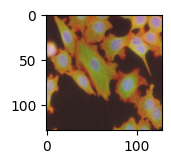

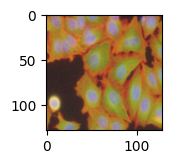

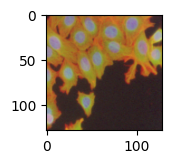

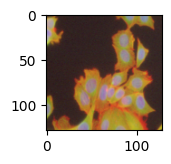

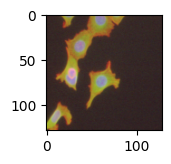

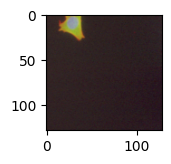

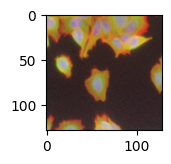

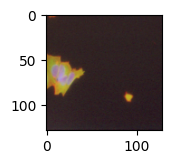

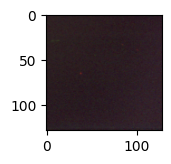

In [81]:
for p in patches:
    plt.figure(figsize=(1.5, 1.5))
    plt.imshow(p)
    plt.show()

## Create and save metadata 

In [210]:
all_drug_metadata = pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/raw/BBBC021_v1_compound.csv", 
                                index_col=0)
all_drug_metadata

,smiles
compound,
DMSO,NaN
leupeptin,CC(C)C[C@H](NC(=O)C)C(=O)N[C@@H](CC(C)C)C(=O)N...
taxol,CC(=O)O[C@H]1C(=O)[C@]2(C)[C@@H](O)C[C@H]3OC[C...
camptothecin,CC[C@@]1(O)C(=O)OCC2=C1C=C3N(Cc4cc5ccccc5nc34)...
Cdk1 inhibitor III,CCOC(=O)c1cnc2oc3ccc(O)cc3c2c1c4ccccc4
...,...
LY-294002,O=C1C=C(Oc2c1cccc2c3ccccc3)N4CCOCC4
SB-202190,Oc1ccc(cc1)c2nc(c3ccc(F)cc3)c([nH]2)c4ccncc4
AZ701,CN(CCOc1cccc2ncnc(Nc3ccc(OCc4ccccn4)c(Cl)c3)c1...


In [211]:
m_old = pd.read_csv("/home/icb/alessandro.palma/environment/IMPA/IMPA/project_folder/datasets/bbbc021_all_large/metadata/bbbc021_large.csv",
           index_col=0)
m_old.loc[m_old.CPD_NAME=="DMSO"]

,SAMPLE_KEY,BATCH,TABLE_NUMBER,IMAGE_NUMBER,OBJECT_NUMBER,CPD_NAME,SMILES,DOSE,ANNOT,STATE,split,SPLIT
112,Week1_22123_1_1_0,Week1_22123,1,1,0,DMSO,CS(=O)C,0.0,DMSO,control,test,test
113,Week1_22123_1_1_1,Week1_22123,1,1,1,DMSO,CS(=O)C,0.0,DMSO,control,test,test
114,Week1_22123_1_1_2,Week1_22123,1,1,2,DMSO,CS(=O)C,0.0,DMSO,control,train,train
115,Week1_22123_1_1_3,Week1_22123,1,1,3,DMSO,CS(=O)C,0.0,DMSO,control,test,test
116,Week1_22123_1_2_0,Week1_22123,1,2,0,DMSO,CS(=O)C,0.0,DMSO,control,test,test
...,...,...,...,...,...,...,...,...,...,...,...,...
8203,Week4_27542_4_719_3,Week4_27542,4,719,3,DMSO,CS(=O)C,0.0,DMSO,control,train,train
8204,Week4_27542_4_720_0,Week4_27542,4,720,0,DMSO,CS(=O)C,0.0,DMSO,control,train,train
8205,Week4_27542_4_720_1,Week4_27542,4,720,1,DMSO,CS(=O)C,0.0,DMSO,control,train,train
8206,Week4_27542_4_720_2,Week4_27542,4,720,2,DMSO,CS(=O)C,0.0,DMSO,control,train,train


In [212]:
target_metadata = {"SAMPLE_KEY":[],
                   "BATCH":[],
                   "TABLE_NUMBER": [], 
                   "IMAGE_NUMBER": [],
                   "OBJECT_NUMBER": [],
                   "CPD_NAME": [],
                   "SMILES": [],
                   "DOSE": [],
                   "ANNOT": [],
                   "STATE": []}

for row in metadata.iterrows():
    week = row[1].Image_PathName_DAPI.split("/")[0]
    plate = row[1].Image_PathName_DAPI.split("/")[1].split("_")[1]

    
    for i in range(9):
        BATCH = f"{week}_{plate}"
        TABLE_NUMBER = row[0]
        IMAGE_NUMBER = row[1].ImageNumber
        OBJECT_NUMBER = i
        CPD_NAME = row[1].Image_Metadata_Compound
        SMILES = "CS(=O)C" if CPD_NAME == "DMSO" else all_drug_metadata.loc[CPD_NAME, "smiles"]
        DOSE = row[1].Image_Metadata_Concentration
        ANNOT = row[1].Image_Metadata_Compound
        STATE =  "control" if CPD_NAME == "DMSO" else "trt" 
        SAMPLE_KEY = f"{week}_{plate}_{TABLE_NUMBER}_{IMAGE_NUMBER}_{i}" 

        target_metadata["SAMPLE_KEY"].append(SAMPLE_KEY)
        target_metadata["BATCH"].append(BATCH)
        target_metadata["TABLE_NUMBER"].append(TABLE_NUMBER)
        target_metadata["IMAGE_NUMBER"].append(IMAGE_NUMBER)
        target_metadata["OBJECT_NUMBER"].append(OBJECT_NUMBER)
        target_metadata["CPD_NAME"].append(CPD_NAME)
        target_metadata["SMILES"].append(SMILES)
        target_metadata["DOSE"].append(DOSE)
        target_metadata["ANNOT"].append(ANNOT)
        target_metadata["STATE"].append(STATE)

In [213]:
metadata_final = pd.DataFrame(target_metadata)

In [214]:
metadata_final = metadata_final.loc[~pd.isna(metadata_final.SMILES)]

In [216]:
metadata_final.to_csv("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/processed/bbbc021_unannotated_large/metadata/bbbc021_unannotated_large.csv")

In [217]:
metadata_final

,SAMPLE_KEY,BATCH,TABLE_NUMBER,IMAGE_NUMBER,OBJECT_NUMBER,CPD_NAME,SMILES,DOSE,ANNOT,STATE,SPLIT
0,Week4_27481_4_233_0,Week4_27481,4,233,0,5-fluorouracil,FC1=CNC(=O)NC1=O,0.003,5-fluorouracil,trt,train
1,Week4_27481_4_233_1,Week4_27481,4,233,1,5-fluorouracil,FC1=CNC(=O)NC1=O,0.003,5-fluorouracil,trt,train
2,Week4_27481_4_233_2,Week4_27481,4,233,2,5-fluorouracil,FC1=CNC(=O)NC1=O,0.003,5-fluorouracil,trt,train
3,Week4_27481_4_233_3,Week4_27481,4,233,3,5-fluorouracil,FC1=CNC(=O)NC1=O,0.003,5-fluorouracil,trt,train
4,Week4_27481_4_233_4,Week4_27481,4,233,4,5-fluorouracil,FC1=CNC(=O)NC1=O,0.003,5-fluorouracil,trt,test
...,...,...,...,...,...,...,...,...,...,...,...
118795,Week9_39301_9_3600_4,Week9_39301,9,3600,4,DMSO,CS(=O)C,0.000,DMSO,control,train
118796,Week9_39301_9_3600_5,Week9_39301,9,3600,5,DMSO,CS(=O)C,0.000,DMSO,control,train
118797,Week9_39301_9_3600_6,Week9_39301,9,3600,6,DMSO,CS(=O)C,0.000,DMSO,control,train
118798,Week9_39301_9_3600_7,Week9_39301,9,3600,7,DMSO,CS(=O)C,0.000,DMSO,control,train


In [215]:
np.random.seed(42)

# Create a mask that randomly assigns 20% to training and 80% to testing
mask = np.random.rand(len(metadata_final)) > 0.2

# Add the 'SPLIT' column
metadata_final['SPLIT'] = np.where(mask, 'train', 'test')

In [203]:
# pd.read_csv("/lustre/groups/ml01/workspace/alessandro.palma/imCPA_official/data/bbbc021_unannotated/processed/bbbc021_unannotated_large/metadata/bbbc021_unannotated_large.csv")

## Extract SMILES encoding for all drug

In [149]:
smile_encoding = pd.read_csv("/home/icb/alessandro.palma/environment/IMPA/IMPA/embeddings/csv/emb_fp.csv", 
                            index_col=0)
smile_encoding

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
docetaxel,0,2,0,0,0,0,0,0,0,0,...,0,0,0,1,0,6,0,0,0,0
taxol,0,2,0,0,0,0,0,0,0,0,...,0,0,0,2,0,6,0,0,0,0
PP-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MG-132,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
lactacystin,0,3,0,0,0,0,0,0,0,0,...,0,0,0,1,0,2,0,0,0,0
cyclohexamide,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
simvastatin,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,7,0,0,0,0
proteasome inhibitor I,0,6,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
emetine,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
ALLN,0,5,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [158]:
smiles_and_drug_dict = dict(zip(metadata_final.SMILES,metadata_final.CPD_NAME))

In [159]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Function to generate Morgan fingerprints
def generate_morgan_fingerprints(smiles, radius=2, n_bits=1024):
    mol = Chem.MolFromSmiles(smiles)
    fingerprint = AllChem.GetMorganFingerprintAsBitVect(mol, radius, nBits=n_bits)
    return fingerprint

smiles_fp = []
drug_idx = []
for smiles in smiles_and_drug_dict:
    smiles_fp.append(generate_morgan_fingerprints(smiles))
    drug_idx.append(smiles_and_drug_dict[smiles])

In [161]:
smiles_fp_df = pd.DataFrame(np.array(smiles_fp))
smiles_fp_df.index = drug_idx

In [166]:
smiles_fp_df

,0,1,2,3,4,5,6,7,8,9,...,1014,1015,1016,1017,1018,1019,1020,1021,1022,1023
5-fluorouracil,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
acyclovir,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AG-1478,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ALLN,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
aloisine A,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ138,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ701,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AZ258,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
AZ841,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [167]:
smiles_fp_df.to_csv("/home/icb/alessandro.palma/environment/IMPA/IMPA/embeddings/csv/emb_fp_all.csv")